In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import torch
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="Banana_Windows_x86_64/Banana.exe",no_graphics=True)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

action_size = brain.vector_action_space_size
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [2]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    times = []                        # list containing scores from each episode
    times_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                   # initialize epsilon
    actionC = 0
    bestAvg = 0
    for i_episode in range(1, n_episodes+1):
        start = datetime.datetime.now()
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]       
        score = 0        
        while True:
            action = agent.act(state, eps)
            
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0] 
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            move += 1
            if done:
                break 
                
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        moves_window.append(move)       # save most recent score
        moves.append(move)         
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        time =  datetime.datetime.now() -start
        times.append(time)
        times_window.append(time)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tAverage time/eps: {:s}'.format(i_episode, np.mean(scores_window),str(np.mean(times_window))), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\tAverage time/eps: {:s}'.format(i_episode, np.mean(scores_window),str(np.mean(times_window))))
        if np.mean(scores_window)>=13.0 and bestAvg <= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:s}\tAverage time/eps: {:.2f}'.format(i_episode-100, np.mean(scores_window),str(np.mean(times_window))))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_trained_{:d}_episodes.pth'.format(i_episode))
            bestAvg = np.mean(scores_window)            
    
    return scores

In [3]:
from dqn_agent import Agent

agent = Agent(state_size, action_size, seed=0)

cpu
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)


Episode 100	Average Score: 0.96 Average Moves: 300.00
Episode 200	Average Score: 4.30 Average Moves: 300.00
Episode 300	Average Score: 7.47 Average Moves: 300.00
Episode 400	Average Score: 9.41 Average Moves: 300.00
Episode 496	Average Score: 13.03 Average Moves: 300.00
Environment solved in 396 episodes!	Average Score: 13.03 Average Moves: 300.00


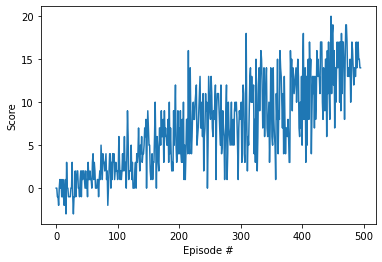

In [4]:
scores = dqn(1000)
env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
plt.savefig('graph_trained_{:d}_episodes.png'.format(len(scores))